In [44]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')

from matplotlib.pyplot import imshow

In [45]:
import os
from PIL import Image
import numpy
import random

image_dir = '/home/geetika/captcha/dataset_ssd_1T/variable_dataset/'
import model
files = os.listdir(image_dir)

In [47]:
import model
from model.captcha_cracker import CaptchaCracker

import theano
theano.config.floatX = "float64"

lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset_nvocab/lstm_more_lstm'
cracker = model.captcha_cracker.CaptchaCracker(
    lstm_model_params_prefix, includeCapital=True, multi_chars=True,
    rescale_in_preprocessing=False, num_rnn_steps=8, use_mask_input=False, cnn_dense_layer_sizes = 256,
    lstm_layer_units = 512)



The output file is available at /home/geetika/model_graph.png


input:   4 C96C
output:  4 C96C
predicted_char= C
[('C', 0.83612110335551149), ('G', 0.13964018557521563), ('O', 0.0090027134840633353), ('6', 0.0042053282719016162), ('Q', 0.0038554615956553056), ('c', 0.0020913199737344255), ('0', 0.0017969070161095539), ('t', 0.00064134585554978996), ('f', 0.00050067153103772319), ('8', 0.00034618175698423288)]
predicted_char= 9
[('9', 0.98522748854844888), ('S', 0.0035502165650979117), ('0', 0.002398857609376043), ('O', 0.0020120291049949761), ('8', 0.0018504491401307738), ('3', 0.0012398322067145012), ('V', 0.00058061667642843437), ('D', 0.00054248308015342108), ('2', 0.00044474112720729425), ('6', 0.0003746664166905568)]
predicted_char= 6
[('6', 0.95724941305454314), ('S', 0.02486264343564722), ('G', 0.0095456916769870327), ('0', 0.0029799181259081496), ('C', 0.0023467427005198047), ('9', 0.00075349772094721414), ('O', 0.00059481972879315236), ('8', 0.00040082539339787385), ('o', 0.00039180459205037443), ('b', 0.00020641237298041939)]
predicted_c

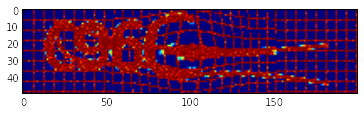

In [62]:
file_path = os.path.join(image_dir, random.choice(files)) 
input = (file_path.rsplit("/", 1)[1].split('_')[1].split(".jpg")[0])
print "input:  ",len(input),input
#Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))
predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)
output = "".join(x for x in predicted_chars if x != 'unk' ) 
print "output: ", len(output), output 
for i in range(len(predicted_chars)):
    print 'predicted_char= {0}'.format(predicted_chars[i]) 
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]